In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [14]:
digits=load_digits()

In [15]:
df=pd.DataFrame(digits.data)
df['Target']=digits.target
print(df.head)

<bound method NDFrame.head of         0    1     2     3     4     5    6    7    8    9  ...   55   56  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  0.0  0.0   

       57   58    59    60    61   62   63  T

In [16]:
kmeans=KMeans(n_clusters=10,random_state=42)
kmeans.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

In [18]:
df["Cluster"]=kmeans.labels_
print(df.head())

     0    1    2     3     4     5    6    7    8    9  ...   56   57   58  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  6.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  7.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     59    60    61   62   63  Target  Cluster  
0  13.0  10.0   0.0  0.0  0.0       0        5  
1  11.0  16.0  10.0  0.0  0.0       1        7  
2   3.0  11.0  16.0  9.0  0.0       2        7  
3  13.0  13.0   9.0  0.0  0.0       3        6  
4   2.0  16.0   4.0  0.0  0.0       4        4  

[5 rows x 66 columns]


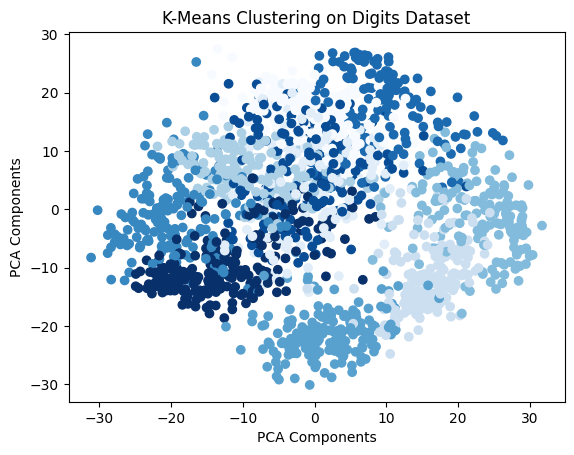

In [28]:
pca=PCA(n_components=2)
pca_result=pca.fit_transform(digits.data)
plt.scatter(pca_result[:, 0],pca_result[:, 1],c=df["Cluster"],cmap="Blues")
plt.xlabel("PCA Components")
plt.ylabel("PCA Components")
plt.title("K-Means Clustering on Digits Dataset")
plt.show()

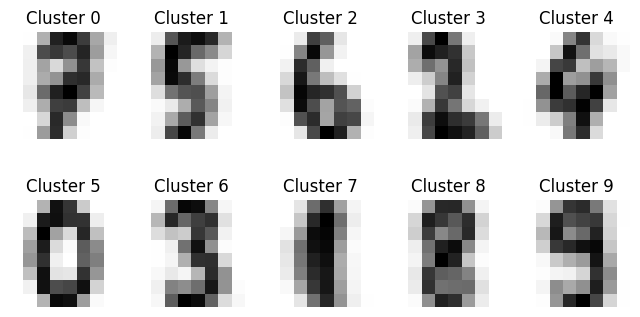

In [29]:
cluster_centers=kmeans.cluster_centers_.reshape(10,8,8)
fig,axes=plt.subplots(2,5,figsize=(8,4))
for i ,ax in enumerate(axes.flat):
    ax.imshow(cluster_centers[i],cmap="binary")
    ax.set_title(f"Cluster {i}")
    ax.axis("off")
plt.show()